------------------------ Let's get the party started! -------------------------------------
../data/macro_economy//china_macro_economy_daily.csv
../data/macro_economy//OECD-world-economy-daily.csv
../data/components//components-top10.csv
../data/000300.SH/000300.SH.csv ===============
Factors Shape: (2671, 135)
---- Trend Distribution Check --------
0.0     960
1.0     558
2.0    1153
dtype: int64
input data shape:  (2671, 135)
input label shape:  (2671,)


/usr/local/lib/python3.5/dist-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


prediction model input data shape:  (2663, 8)
train sample:  2360 data_dim 8
training size:  2360
testing size:  280
Train on 2360 samples, validate on 280 samples
Epoch 1/100
2360/2360 [==============================] - 8s - loss: 1.0917 - acc: 0.4576 - val_loss: 1.0368 - val_acc: 0.5357
Epoch 2/100
2360/2360 [==============================] - 7s - loss: 1.0377 - acc: 0.5195 - val_loss: 0.9295 - val_acc: 0.6036
Epoch 3/100
2360/2360 [==============================] - 7s - loss: 0.9027 - acc: 0.6161 - val_loss: 0.8276 - val_acc: 0.6464
Epoch 4/100
2360/2360 [==============================] - 7s - loss: 0.8232 - acc: 0.6508 - val_loss: 0.8231 - val_acc: 0.6607
Epoch 5/100
2360/2360 [==============================] - 7s - loss: 0.7997 - acc: 0.6568 - val_loss: 0.8072 - val_acc: 0.6607
Epoch 6/100
2360/2360 [==============================] - 7s - loss: 0.7868 - acc: 0.6640 - val_loss: 0.7942 - val_acc: 0.6714
Epoch 7/100
2360/2360 [==============================] - 7s - loss: 0.7794 - acc

2360/2360 [==============================] - 7s - loss: 0.3401 - acc: 0.8589 - val_loss: 1.3085 - val_acc: 0.6071
Epoch 65/100
2360/2360 [==============================] - 7s - loss: 0.3395 - acc: 0.8691 - val_loss: 1.4573 - val_acc: 0.6321
Epoch 66/100
2360/2360 [==============================] - 7s - loss: 0.3132 - acc: 0.8737 - val_loss: 1.2185 - val_acc: 0.6464
Epoch 67/100
2360/2360 [==============================] - 7s - loss: 0.3052 - acc: 0.8780 - val_loss: 1.3036 - val_acc: 0.6321
Epoch 68/100
2360/2360 [==============================] - 7s - loss: 0.3887 - acc: 0.8436 - val_loss: 1.3442 - val_acc: 0.5643
Epoch 69/100
2360/2360 [==============================] - 7s - loss: 0.3217 - acc: 0.8716 - val_loss: 1.2875 - val_acc: 0.5964
Epoch 70/100
2360/2360 [==============================] - 7s - loss: 0.2918 - acc: 0.8801 - val_loss: 1.2331 - val_acc: 0.6464
Epoch 71/100
2360/2360 [==============================] - 7s - loss: 0.2931 - acc: 0.8716 - val_loss: 1.3136 - val_acc: 0.63

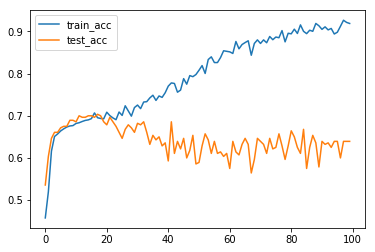

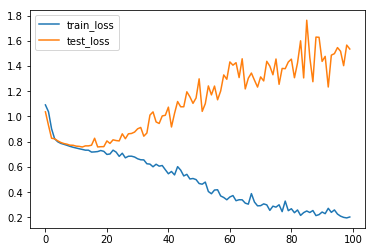

'\npredictions = np.argmax(model.predict(test_x, batch_size=batch_size), axis = 1)\n\nplt.plot(predictions, label = \'prediction\')\nplt.plot(test_y, label = \'label\')\nplt.legend()\nplt.show()\n# real price\n#price.plot()\n\n# points of transactions \ntest_price = price.iloc[train_size * batch_size + time_steps: (train_size + test_size) * batch_size + time_steps]\ntest_priceDF = priceDF[train_size * batch_size + time_steps: (train_size + test_size) * batch_size + time_steps]\ndeals = []\nreturns = 0.\nror = []\n# if the predicted trend is downtrend, sell now(means do nothing), otherwise add futures\' difference\n# which means to shoulder the consequence of price difference\nfor i in range(len(predictions)):\n    if predictions[i] > 0:\n        returns += test_priceDF[i]\n        deals.append(test_price[i])\n    else:\n        deals.append(2000) # means down trend will occur\n    ror.append(returns)\n\nfig = plt.gcf()\nfig.set_size_inches(14, 8)\nx = np.array([i for i in range(len(dea

In [10]:

from keras.models import Model, Sequential, load_model
from keras.layers import Input, LSTM, RepeatVector
from keras.layers import Dense
from sklearn import preprocessing
'''
Preparing data
'''
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import math

'''
Reading Macro economy factors from CSV
Notice: data are distributed monthly, need to be filled for daily usage
'''
def strip_comma(x):
    return float(str(x).replace(',',''))
def read_macro_economy(base_dir = '../data/macro_economy/', 
                       filename = 'china_macro_economy_daily.csv',
                       start_date = '2002-01-04', end_date = '2017-11-30',
                       names = [i for i in range(31)],
                       usecols = None):
    filename = base_dir +'/'+ filename
    print (filename) #中文读取出问题，所以skip row1
    df = pd.read_csv(filename, index_col=0, sep=',', 
                     skiprows=1, usecols=usecols,
                     names = names, parse_dates=True,
                     converters = {11: strip_comma, 22: strip_comma}
                    )
    return df[start_date : end_date]


'''
Reading World economy factors sponsored by OECD from CSV
Notice: data are distributed monthly, need to be filled for daily usage
'''
def read_world_economy(base_dir = '../data/macro_economy/', 
                       filename = 'OECD-world-economy-daily.csv',
                       start_date = '2002-01-04', end_date = '2017-11-30',
                       names = [i for i in range(46)],
                       usecols = None):
    filename = base_dir +'/'+ filename
    print (filename) 
    df = pd.read_csv(filename, index_col=0, 
                     skiprows=1, usecols=usecols,parse_dates=True,
                     names = names
                    )
    return df[start_date : end_date]

'''
Reading Top10 Components CSV
Data has been assigned weight according to their ratio in the market

# Ref: data calculated from data/generate/FetchingComponentsData.ipynb
'''
def read_components(base_dir = '../data/components/', 
                       filename = 'components-top10.csv',
                       start_date = '2002-01-04', end_date = '2017-11-30',
                       names = [i for i in range(10)]):
    filename = base_dir +'/'+ filename
    print (filename) 
    df = pd.read_csv(filename, index_col=0, 
                     skiprows=1,parse_dates=True,
                     names = names
                    )
    df = df.fillna(0)
    return df[start_date : end_date]

'''
Reading ohlcv transaction data for a stock

'''
def readWSDFile(baseDir, stockCode, startDate='2005-01-04', endDate= '2015-12-31', usecols=None, 
                names=['date','pre_close','open','high','low','close','change','chg_range',
                                               'volume','amount','turn']):
    # 解析日期
    filename = baseDir+stockCode+'/'+stockCode+'.csv'
    print (filename, "===============")
    dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d').date()
    df = pd.read_csv(filename, index_col=0, sep=',', header=None,usecols=usecols,
                            skiprows=1, names=names,
                           parse_dates=True, date_parser=dateparse)
    df = df.fillna(0)
    return df[startDate : endDate]

'''
Reading Technical indicators of a stock
'''
def readWSDIndexFile(baseDir, stockCode, startYear, yearNum=1):
    # parse date
    dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d').date()

    df = 0
    for i in range(yearNum):
        tempDF = pd.read_csv(baseDir+'I'+stockCode+'/wsd_'+stockCode+'_'+str(startYear+i)+'.csv', index_col=0, sep=',', parse_dates=True, date_parser=dateparse
                             # , usecols=usecols
                             )
        if i==0: df = tempDF
        else: df = df.append(tempDF)
    df = df.fillna(0)
    return df

'''
Preparing all the useful data
'''
# 整理好多因子输入，以dataframe返回数据+标签
def data_prepare(retrace = 0.618, dtype = 'all', start_date='2005-01-04', end_date= '2015-12-31'):
    # prepare data
    baseDir = '../data/'
    stockCodes = ['000300.SH']
    i = 0
    startYear = 2005
    number =11
    print("------------------------ Let's get the party started! -------------------------------------")
    ## Load data from CSV
    dfm = read_macro_economy(start_date = start_date, end_date = end_date)
    dfw = read_world_economy(start_date = start_date, end_date = end_date)
    dfc = read_components(start_date = start_date, end_date = end_date)
    df = readWSDFile(baseDir, stockCodes[i], start_date, end_date)
    dfi = readWSDIndexFile(baseDir, stockCodes[i], startYear, number)
    allDF = df
    if dtype == 'all':
        allDF = pd.concat([df, dfi, dfm, dfw, dfc], axis=1)
    elif dtype == 'only_m':
        allDF = pd.concat([df, dfm], axis=1) # macro economy 
    elif dtype == 'only_i':
        allDF = pd.concat([df, dfi], axis=1) # technical indicators
    elif dtype == 'only_w':
        allDF = pd.concat([df, dfw], axis=1) # world economy
    elif dtype == 'only_c':
        allDF = pd.concat([df, dfc], axis=1) # constitutant stock
    elif dtype == 'im':
        allDF = pd.concat([df, dfi, dfm], axis=1) 
    elif dtype == 'ic':
        allDF = pd.concat([df, dfi, dfc], axis=1) 
    else:
        pass
    allDF = allDF.fillna(0)
    sample_num = np.shape(df)[0]
    labelDF = pd.Series(np.zeros(sample_num))
    print ("Factors Shape:", np.shape(allDF))
    
    # 求出 trend
    price = df['close']
    start = 0
    while price[start] > price[start+1]:
        labelDF[start] = 1 #flat
        start +=1
    
    #find peak, find trough, calculate retracement and label trend accordingly
    i = start
    while i < sample_num - 1:
        cursor = i
        while cursor < sample_num - 1 and price[cursor] <= price[cursor+1]:
            cursor += 1
        peak = cursor
        while cursor < sample_num - 1 and price[cursor] >= price[cursor+1]:
            cursor += 1
        trough = cursor
        retracement = (price[peak] - price[trough]) / (price[peak] - price[i])
        mark = 1 # flat
        if retracement < retrace:
            mark = 2 # UP
        elif retracement > 1 + retrace:
            mark = 0 # DOWN
        for k in range(i, cursor+1):
            labelDF[k] = mark
        i = cursor

    print("---- Trend Distribution Check --------")
    print(labelDF.value_counts().sort_index())
    
    # make a deep copy of Price Difference before normalizing
    priceDF = allDF['change'].copy(deep=True)
    # normalize(x)
    scaler = preprocessing.MinMaxScaler()
    input_data = scaler.fit_transform(allDF)
    print ("input data shape: ", np.shape(input_data)) #  days *  factors
    print ("input label shape: ", np.shape(labelDF))
    labels = labelDF.values
    #input_data = np.concatenate((input_data, labels.reshape(-1,1)), axis = 1) # historical data as part of the series
    return input_data, labels, priceDF, price # train/test data, labels, prices difference, actual price for yield calucluation


###### Hyper paramters #########
time_steps = 8
n_neurons = 200
num_classes = 3
batch_size = 20 # specify batch size explicitly; no shuffle but successive sequence
n_epoch_ae = 30
n_epoch = 100
train_ratio = 0.9
concate = False # without using historical labels as input data
t0 = time()
dataset,labels, priceDF, price = data_prepare()
segment_num = (len(dataset) - time_steps - 1) // batch_size # rollingly use data
train_size = int(segment_num * train_ratio)
test_size = segment_num - train_size
data_dim = np.shape(dataset)[1] #input + historic labels
'''
#divide training/validation dataset; numpy array
train_x = dataset[0 : train_size * batch_size + time_steps]
test_x = dataset[train_size * batch_size : (train_size + test_size) * batch_size + time_steps]

#historic label as input time series
train_historic_label = np.array(labels[0 : train_size * batch_size + time_steps]).reshape(-1,1)
test_historic_label = np.array(labels[train_size * batch_size : (train_size + test_size) * batch_size + time_steps]).reshape(-1,1)

#Sliding window: label is just 1 step further after sequence data
train_y = labels[time_steps : train_size * batch_size + time_steps]
test_y = labels[train_size * batch_size + time_steps: (train_size + test_size) * batch_size + time_steps]

# add historical trends or not
if concate:
    data_dim += 1
    train_x = np.concatenate((train_x, train_historic_label), axis = 1)
    test_x = np.concatenate((test_x, test_historic_label), axis = 1)

train_sample = len(train_x) - time_steps
b = np.array([[]])
# creating data in a rolling window view 
for i in range(train_sample):
    b = np.append(b, train_x[i : time_steps + i])
train_x = b.reshape(train_sample, time_steps, data_dim)
print("training size: ", train_sample)

test_sample = len(test_x) - time_steps
b = np.array([[]])
for i in range(test_sample):
    b = np.append(b, test_x[i : time_steps + i])
test_x = b.reshape(test_sample, time_steps, data_dim)
print("testing size: ", test_sample)

train_y = np.array(train_y, dtype=np.int32)
test_y = np.array(test_y, dtype=np.int32)

############## AutoEncoder MODEL ##########################
latent_dim = 8
layer1 = 128
layer2 = 32
layers = [layer2,layer1]
inputs = Input(shape=(time_steps, data_dim))
encoded = LSTM(units = layer1, return_sequences = True)(inputs)
encoded = LSTM(units = layer2, return_sequences = True)(encoded)
encoded = LSTM(units = latent_dim, return_sequences = False)(encoded) # most hidden layer, only preseve the last step's output

repeated_out = RepeatVector(time_steps)(encoded)  # repeat intermediate output [2D -> 3D]

decoded = LSTM(layer2, return_sequences=True)(repeated_out)
decoded = LSTM(layer1, return_sequences=True)(decoded)
decoded = LSTM(data_dim, return_sequences=True)(decoded)  # output layer as a comparison

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)  ## encoder for dimensionality reduction

sequence_autoencoder.compile(optimizer='rmsprop', 
                             loss='mean_squared_error',
                             )
history = sequence_autoencoder.fit(x = train_x, y = train_x, 
                         batch_size=batch_size,
                         epochs=n_epoch_ae,
                         shuffle=False,
                         validation_data = (test_x, test_x))
print ("Params: ", "time_steps:", time_steps, " latent_dim:", 
       latent_dim, " batch_size: ",batch_size, " n_epoch: ", 
       n_epoch, 'layers', layers, "\n Time cost: ", (time() - t0))

encoder.save('autoencoder-135d-8ts-100ep-128-32-8.h5')
compressed_data = encoder.predict(dataset)

'''
## load model from file
encoder = load_model('autoencoder-135d-8ts-100ep-128-32-8.h5')
# rolling window
b = np.array([[]])
n_sample = len(dataset) - time_steps
for i in range(n_sample):
    b = np.append(b, dataset[i : time_steps + i])
dataset = b.reshape(n_sample, time_steps, data_dim)
compressed_data = encoder.predict(dataset)


dataset = compressed_data

################################################################
########### Prediction Model ###################################
# divide training/validation dataset 
segment_num = (len(dataset) - time_steps - 1) // batch_size # rollingly use data
train_size = int(segment_num * train_ratio)
test_size = segment_num - train_size
data_dim = np.shape(dataset)[1]
print ("prediction model input data shape: ", np.shape(dataset)) 

#divide training/validation dataset; numpy array
train_x = dataset[0 : train_size * batch_size + time_steps]
test_x = dataset[train_size * batch_size : (train_size + test_size) * batch_size + time_steps]
# rolling window
train_sample = len(train_x) - time_steps
print ("train sample: ", train_sample, "data_dim",data_dim)
b = np.array([[]])
for i in range(train_sample):
    b = np.append(b, train_x[i : time_steps + i])
train_x = b.reshape(train_sample, time_steps, data_dim)
print("training size: ", train_sample)

test_sample = len(test_x) - time_steps
b = np.array([[]])
for i in range(test_sample):
    b = np.append(b, test_x[i : time_steps + i])
test_x = b.reshape(test_sample, time_steps, data_dim)
print("testing size: ", test_sample)

#Sliding window: label is just 1 step further after sequence data
train_y = labels[time_steps : train_size * batch_size + time_steps]
test_y = labels[train_size * batch_size + time_steps: (train_size + test_size) * batch_size + time_steps]
train_y = np.array(train_y, dtype=np.int32)
test_y = np.array(test_y, dtype=np.int32)


layers = 5
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(n_neurons, return_sequences=True,stateful=True,
               batch_input_shape=(batch_size, time_steps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(n_neurons, return_sequences=True, stateful=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(n_neurons, return_sequences=True, stateful=True)) 
model.add(LSTM(n_neurons, stateful=True))  # return a single vector of dimension 32
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', #for integer class, not one hot encoding
              optimizer='rmsprop',
              metrics=['accuracy'])   

history = model.fit(train_x, train_y,
          batch_size=batch_size, 
          epochs=n_epoch,
          shuffle=False,
          validation_data=(test_x, test_y))

print ("Params: ", "time_steps:", time_steps, "  n_neurons:", n_neurons, 
       " batch_size: ",batch_size, " n_epoch: ", n_epoch, 'layers',
       layers, "\n Time cost: ", (time() - t0))

# plot history

plt.plot(history.history['acc'], label='train_acc')
plt.plot(history.history['val_acc'], label='test_acc')
plt.legend()
plt.show()
# loss

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()
# prediction check & visualization
#model.save('classifier.h5')
'''
predictions = np.argmax(model.predict(test_x, batch_size=batch_size), axis = 1)

plt.plot(predictions, label = 'prediction')
plt.plot(test_y, label = 'label')
plt.legend()
plt.show()
# real price
#price.plot()

# points of transactions 
test_price = price.iloc[train_size * batch_size + time_steps: (train_size + test_size) * batch_size + time_steps]
test_priceDF = priceDF[train_size * batch_size + time_steps: (train_size + test_size) * batch_size + time_steps]
deals = []
returns = 0.
ror = []
# if the predicted trend is downtrend, sell now(means do nothing), otherwise add futures' difference
# which means to shoulder the consequence of price difference
for i in range(len(predictions)):
    if predictions[i] > 0:
        returns += test_priceDF[i]
        deals.append(test_price[i])
    else:
        deals.append(2000) # means down trend will occur
    ror.append(returns)

fig = plt.gcf()
fig.set_size_inches(14, 8)
x = np.array([i for i in range(len(deals))])
s = np.random.rand(*x.shape) * 100
plt.scatter(x, deals, c="r", s= s, alpha=0.7, label = "trade signal",marker="v")
plt.plot(test_price.values, label = "close", linewidth=3)
plt.legend()
plt.show()
plt.plot(ror, label = "returns")
plt.legend()
plt.show()
'''

In [ ]:
print('Avg. Train ACC = ', np.average(history.history['acc']))
print('Avg. Test ACC = ', np.average(history.history['val_acc']))

In [98]:
# print(np.shape(x_train), np.shape(y_train))
# print(np.shape(x_val), np.shape(y_val)) # n_epoch 50 较好
'''
部分实验结果

'''
# loss: 11.5555 - acc: 0.1170 - 验证集：val_loss: 11.5740 - val_acc: 0.0800 stateful
# loss: 11.5773 - acc: 0.0940 - 验证集：val_loss: 11.7846 - val_acc: 0.1200 non-stateful

### only Trend as data & label
# loss: 0.4778 - acc: 0.8496 - 验证集：val_loss: 0.4617 - val_acc: 0.8679 #epoch 50, timestep10
# loss: 0.4726 - acc: 0.8492 - 验证集：val_loss: 0.4983 - val_acc: 0.8643 #epoch 50, timestep8

### 48 input factors
# 1s - loss: 0.9957 - acc: 0.4924 - val_loss: 1.0208 - val_acc: 0.4393 # timesteps: 15
# 1s - loss: 1.0042 - acc: 0.4609 - val_loss: 1.0317 - val_acc: 0.4964 # ts: 10

## 10 input factors
#1s - loss: 1.0671 - acc: 0.4277 - val_loss: 1.0264 - val_acc: 0.4714 # ts: 10
#1s - loss: 1.0597 - acc: 0.4458 - val_loss: 1.0206 - val_acc: 0.5571 # ts: 15

## 5 input factors
#1s - loss: 1.0607 - acc: 0.4178 - val_loss: 1.0135 - val_acc: 0.5321 # ts: 15
#loss: 1.0298 - acc: 0.4703 - val_loss: 1.1556 - val_acc: 0.4607 # normalized
#0s - loss: 1.0476 - acc: 0.4567 - val_loss: 1.1052 - val_acc: 0.3250 #ts: 3, normalized

## 3 input factors: close, change, change_range
#0s - loss: 1.0203 - acc: 0.5067 - val_loss: 1.0191 - val_acc: 0.5071 #ts: 3, normalized

## 2 input: close, change
#0s - loss: 1.0121 - acc: 0.5109 - val_loss: 0.9810 - val_acc: 0.5393
#0s - loss: 1.0512 - acc: 0.4500 - val_loss: 1.0216 - val_acc: 0.3857 #normalized

#1s - loss: 1.0554 - acc: 0.4265 - val_loss: 1.0615 - val_acc: 0.3607 # ts : 10, epoch: 10
#loss: 1.0603 - acc: 0.4292 - val_loss: 1.0880 - val_acc: 0.3929 #ts: 20, epoch: 10
#6s - loss: 1.0683 - acc: 0.4292 - val_loss: 1.0253 - val_acc: 0.4714 #ts: 20 120neuron
#loss: 1.0679 - acc: 0.4109 - val_loss: 1.0367 - val_acc: 0.3786 ts: 10


# 增加神经元，增长步骤，增加训练次数 (调最优参数，然后扩展因子)
# neurons: 240, ts: 50
# 46s - loss: 1.0638 - acc: 0.4175 - val_loss: 1.0021 - val_acc: 0.5321

### 使用趋势直接训练
###最原始网络 (timestep 跟训练时长成正比)
######### n_neuron: 100, ts: 100
# 23s - loss: 0.4920 - acc: 0.8448
# - val_loss: 0.4550 - val_acc: 0.8808

#12s - loss: 0.4757 - acc: 0.8462
#- val_loss: 0.5167 - val_acc: 0.8571
#Params:  time_steps: 50   n_neurons: 100


# - 6s - loss: 0.4883 - acc: 0.8458 
# - val_loss: 0.4737 - val_acc: 0.8607
# Params:  time_steps: 25   n_neurons: 100

# - 2s - loss: 0.4939 - acc: 0.8445 
# - val_loss: 0.4711 - val_acc: 0.8571
# Params:  time_steps: 10   n_neurons: 100

# - 0s - loss: 0.5472 - acc: 0.8361 （对训练集有一定影响，如果有规律，100步跟5步差别不大
# - val_loss: 0.4894 - val_acc: 0.8679
# Params:  time_steps: 1   n_neurons: 100


#- 1s - loss: 0.4918 - acc: 0.8454
# - val_loss: 0.4789 - val_acc: 0.8643
# Params:  time_steps: 5   n_neurons: 100

# - 2s - loss: 0.4921 - acc: 0.8462 
# - val_loss: 0.4806 - val_acc: 0.8679
# Params:  time_steps: 10   n_neurons: 100

# 2s - loss: 0.4920 - acc: 0.8466 
# - val_loss: 0.4884 - val_acc: 0.8607
# Params:  time_steps: 8   n_neurons: 100


########### n_neurons  [32- 1000] 越多越慢，ACC 下降，神经元多表达能力可能更强，但有一个折中
# 多个神经元可以较少的轮数学习到表达，但是速度慢；不如少一点神经元，多几轮

# - 5s - loss: 0.4491 - acc: 0.8525 
# - val_loss: 0.4974 - val_acc: 0.8643
# Params:  time_steps: 8   n_neurons: 200 像是没有训练完，多一些神经元表达能力更强一些

# - 5s - loss: 0.3694 - acc: 0.8714
# - val_loss: 0.5253 - val_acc: 0.8536
# Params:  time_steps: 8   n_neurons: 200 有点过拟合了
# 25 epoch 差不多刚好 - 5s - loss: 0.4224 - acc: 0.8534 - val_loss: 0.4995 - val_acc: 0.8357

# - 9s - loss: 0.2803 - acc: 0.8992
# - val_loss: 0.6817 - val_acc: 0.7643
# Params:  time_steps: 8   n_neurons: 300  n_epoch:  25 ； 12个epoch 差不多，85%左右

# - 7s - loss: 0.3706 - acc: 0.8655
# - val_loss: 0.5858 - val_acc: 0.8179
# - 7s - loss: 0.4387 - acc: 0.8504 - val_loss: 0.5065 - val_acc: 0.8571 ====best balance
# Params:  time_steps: 8   n_neurons: 250  n_epoch:  25

#  - 1s - loss: 0.4958 - acc: 0.8471
# - val_loss: 0.4699 - val_acc: 0.8643
# Params:  time_steps: 8   n_neurons: 50  n_epoch:  25 （欠拟合）

# - 6s - loss: 0.4454 - acc: 0.8504
# - val_loss: 0.5171 - val_acc: 0.8571  （20轮 最好）
# Params:  time_steps: 8   n_neurons: 225  n_epoch:  25

#  - 12s - loss: 0.0888 - acc: 0.9731
# - val_loss: 1.0566 - val_acc: 0.7964
##### Params:  time_steps: 8   n_neurons: 225  n_epoch:  75
#  - 6s - loss: 0.3116 - acc: 0.8899
# - val_loss: 0.5166 - val_acc: 0.8464 最佳 30轮

# 对比+2层
#  - 30s - loss: 0.0634 - acc: 0.9803
#  - val_loss: 1.2668 - val_acc: 0.7893
# Params:  time_steps: 8   n_neurons: 300  n_epoch:  75

# - 9s - loss: 0.0413 - acc: 0.9866 
# - val_loss: 1.3421 - val_acc: 0.8179 目前效果最佳
# Params:  time_steps: 8   n_neurons: 300  n_epoch:  100 
# - 17s - loss: nan - acc: 0.3655 - val_loss: nan - val_acc: 0.3143 relu
                    
# selu 训练8轮后应该是变得无穷大截断了
                    
## 增加层数并没有什么显著效果，拖慢训练，准确率下降
# 加2层

# 加5层
#- 30s - loss: 1.0736 - acc: 0.4353 - val_loss: 1.0071 - val_acc: 0.5393
#Params:  time_steps: 8   n_neurons: 300  n_epoch:  50, 8layers
# 加3层
# -- 19s - loss: 1.0764 - acc: 0.4290 - val_loss: 1.0129 - val_acc: 0.5393
# Params:  time_steps: 8   n_neurons: 300  n_epoch:  75  , 6layers

## 降低维度之前
# 12s - loss: 0.0951 - acc: 0.9697 - val_loss: 1.0556 - val_acc: 0.7500 【验证集的准确率】

## QUTUR 模型对接后
## 7s -  loss: 0.0234 - acc: 0.9936 
#  - val_loss: 0.5927 - val_acc: 0.8857 （包含了历史标签）
# Params:  time_steps: 8   n_neurons: 200  batch_size:  20  n_epoch:  100

'\n部分实验结果\n\n'

In [32]:
step = 4
input_dim = 2
a = np.array([[1,111], [2,222], [3,333], [4,444], [5,555], [6,666], [7,777], [8,888], [9,999]])
a_len = len(a)
b = np.array([[]])
for i in range(a_len - step + 1):
    b = np.append(b, a[i : step + i])
print(b)
b = b.reshape(a_len - step + 1, step, input_dim)
print(b)

[   1.  111.    2.  222.    3.  333.    4.  444.    2.  222.    3.  333.
    4.  444.    5.  555.    3.  333.    4.  444.    5.  555.    6.  666.
    4.  444.    5.  555.    6.  666.    7.  777.    5.  555.    6.  666.
    7.  777.    8.  888.    6.  666.    7.  777.    8.  888.    9.  999.]
[[[   1.  111.]
  [   2.  222.]
  [   3.  333.]
  [   4.  444.]]

 [[   2.  222.]
  [   3.  333.]
  [   4.  444.]
  [   5.  555.]]

 [[   3.  333.]
  [   4.  444.]
  [   5.  555.]
  [   6.  666.]]

 [[   4.  444.]
  [   5.  555.]
  [   6.  666.]
  [   7.  777.]]

 [[   5.  555.]
  [   6.  666.]
  [   7.  777.]
  [   8.  888.]]

 [[   6.  666.]
  [   7.  777.]
  [   8.  888.]
  [   9.  999.]]]


In [228]:
# train_x[:20]
#train_y[:20]
#test_x[:20]
cnt = 0
for i in range(len(deals)):
    if deals[i] == 2000:
        cnt += 1
n_trade = (len(deals) - cnt)
print("number of trading: ", n_trade, "ratio: ", n_trade / len(deals))  # ratio:  0.6285714285714286    
print(np.ma.max(deals), np.ma.min(deals))

number of trading:  176 ratio:  0.6285714285714286
5317.46 2000.0


In [85]:
dataset
labels[:40]

0     1.0
1     1.0
2     2.0
3     2.0
4     2.0
5     2.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    2.0
20    2.0
21    2.0
22    2.0
23    2.0
24    2.0
25    2.0
26    2.0
27    2.0
28    2.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
dtype: float64

In [ ]:
'''
log
12.15 Keras 重构LSTM sequence classifier, 归一化数据，reshape成逐个递进的sequence，Keras控制next batch
打印后数据和标签都验证正确；
实验分两块：
1. 数据处理 归一化前后，
2. 网络结构 timestep; n_layer; n_neuron

'''

In [147]:
#from keras.models import load_model

#model = load_model('classifier.h5')
#res = model.predict(test_x[:20])
print (res)
print(np.argmax(res, axis=1)) #证明分类结果没有问题，预测与标签稍有出入
print (test_y[:20])

[[ 0.37498829  0.33530477  0.28970698]
 [ 0.07516985  0.16676961  0.75806057]
 [ 0.08166324  0.15378299  0.76455373]
 [ 0.11993476  0.19191687  0.68814832]
 [ 0.12127711  0.18830372  0.69041914]
 [ 0.73422951  0.19220854  0.07356194]
 [ 0.83337641  0.1101785   0.056445  ]
 [ 0.77435935  0.12012187  0.10551874]
 [ 0.67865074  0.15823054  0.16311863]
 [ 0.62179828  0.19131488  0.1868868 ]
 [ 0.06030776  0.18741526  0.75227702]
 [ 0.03859903  0.11596616  0.84543484]
 [ 0.07701498  0.15228698  0.77069813]
 [ 0.11054873  0.17879441  0.71065688]
 [ 0.12299287  0.18673696  0.69027019]
 [ 0.13000149  0.19494084  0.67505765]
 [ 0.13957547  0.21095687  0.64946765]
 [ 0.14291598  0.22330761  0.63377643]
 [ 0.14281324  0.22483656  0.63235021]
 [ 0.15484965  0.23950839  0.60564202]]
[0 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2]


In [132]:
#test_y[:20]
print(np.shape(train_historic_label),np.shape(train_x))
a = np.array([[1,2],[4,5]])
b = np.array([3,6]).reshape(-1,1)
np.concatenate((a,b),axis=1)

(2388,) (2388, 10)


array([[1, 2, 3],
       [4, 5, 6]])

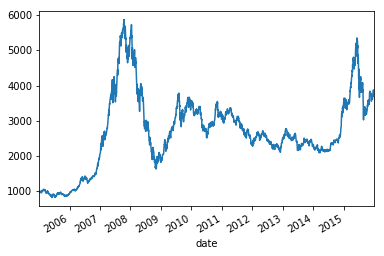

In [168]:
# labels.iloc[train_size * batch_size : train_size * batch_size + 20]
# print(train_historic_label[:28], train_y[:20]) # 证明标签没有问题
price.plot()
plt.show()

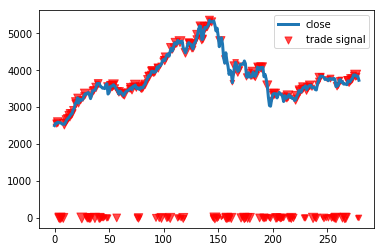

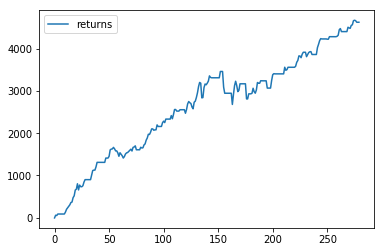

In [213]:
# for i in range(len(predictions)):
#     if predictions[i] > 0:
#         returns += test_priceDF[i]
#         deals.append(test_price[i])
#     else:
#         deals.append(0) # means down trend will occur
#     ror.append(returns)
# plt.plot(test_price, label = "prices")
# test_price.plot()
# plt.legend()
# plt.show()
fig = plt.gcf()
fig.set_size_inches(14, 8)
x = np.array([i for i in range(len(deals))])
s = np.random.rand(*x.shape) * 100
plt.scatter(x[:280], deals[280:560], c="r", s= s, alpha=0.7, label = "trade signal",marker="v")
plt.plot(test_price.values, label = "close", linewidth=3)
plt.legend()
plt.show()
plt.plot(ror[:280], label = "returns")
plt.legend()
plt.show()


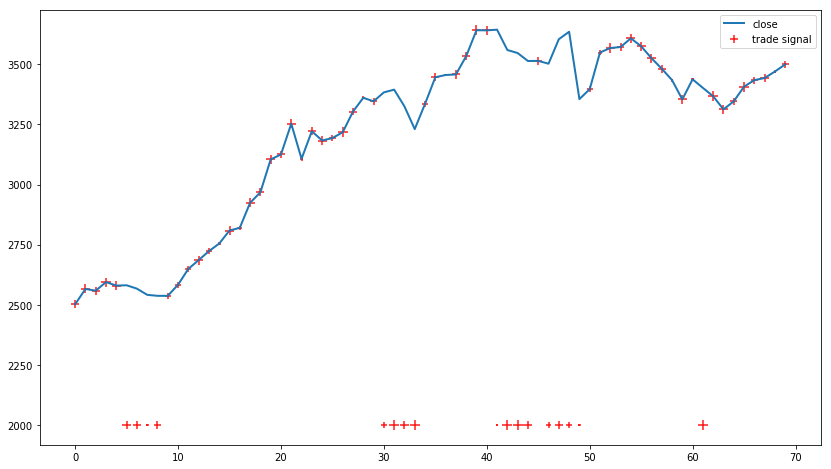

In [223]:
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.scatter(x[:70], deals[:70], c="r", s= s, alpha=0.9, label = "trade signal",marker="+")
plt.plot(test_price.values[:70], label = "close", linewidth=2)
plt.legend()
plt.show()